# Исследование объявлений о продаже квартир

### Импорт и общая информация

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Отсутствует тип bool там где он нужен;
Наличие пропусков данных, особенно много в булевых переменных (где должны быть true/false)

<AxesSubplot:>

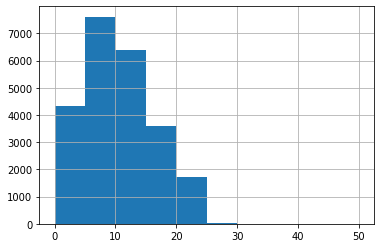

In [5]:
data['total_images'].hist()

С количеством картинок все впорядке.

<AxesSubplot:>

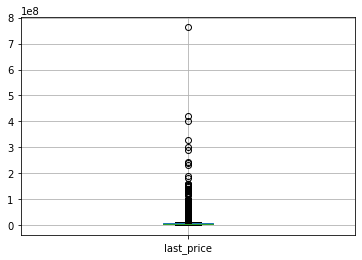

In [6]:
data.boxplot('last_price')

Отчетливо видны выбросы. Тут нужно с ними поработать

<AxesSubplot:>

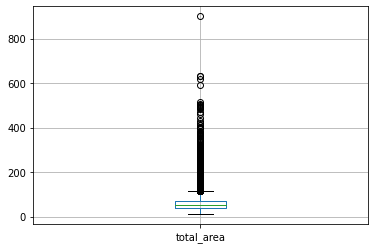

In [7]:
data.boxplot('total_area')

Судя по графику видно, что подавляющая часть значений лежит в диапазоне до 100 квадратов, и есть много выбросов по метражу. Особенно беспокоят значения больше 600. Ангары что ли какие-то? 

In [8]:
data['ceiling_height'].isna().sum()

9195

In [9]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Видим большое количество пропусков и странные значения, как будто бы не поделенные на 10.

<AxesSubplot:>

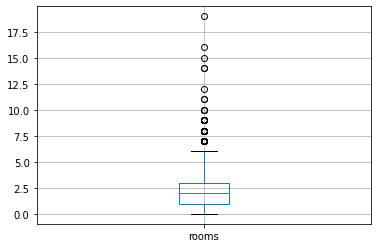

In [10]:
data.boxplot('rooms')

Рапределние по комнатам выглядит нормально

<AxesSubplot:>

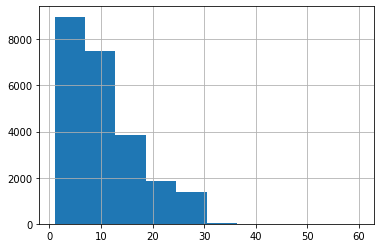

In [11]:
data['floors_total'].hist()

In [12]:
data['floors_total'].isna().sum()

86

С распределением впорядке, и пропусков немного.


<AxesSubplot:>

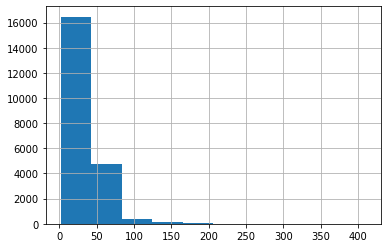

In [13]:
data['living_area'].hist()

In [14]:
data['living_area'].isna().sum()

1903

Распределение вроде в порядке, но вот пропусков много, и ничем их не заменить

<AxesSubplot:>

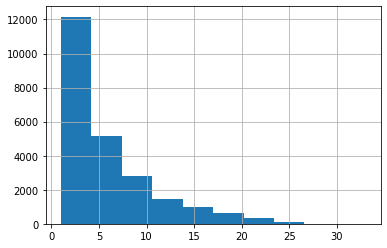

In [15]:
data['floor'].hist()


Все ок, выбросов нет

<AxesSubplot:>

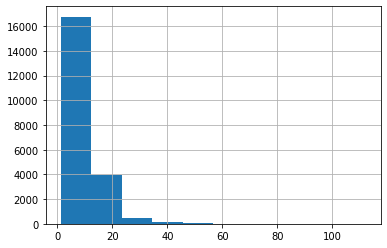

In [16]:
data['kitchen_area'].hist()

Выбросов нет, пропусков много, но их не заменить

<AxesSubplot:>

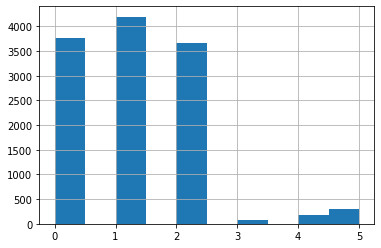

In [17]:
data['balcony'].hist()

Выбросов нет. Пропуски заменим 0

### Предобработка данных

Поработаем с ценой и создадим категории:

In [18]:
def price_cat(row):
    if row['last_price'] <= 200000:
        return 'sus_low'
    elif 200000 < row['last_price'] <= 2000000:
        return 'cheap'
    elif 2000000 < row['last_price'] <= 4000000:
        return 'normal_low'
    elif 4000000  < row['last_price'] <= 8000000:
        return 'normal'
    elif 8000000  < row['last_price'] <= 12000000:
        return 'normal_high'
    elif 12000000  < row['last_price'] <= 50000000:
        return 'expencive'
    elif row['last_price'] > 50000000:
        return 'sus_high'

In [19]:
data['price_cat'] = data.apply(price_cat, axis=1)
data.groupby('price_cat')['price_cat'].count()


price_cat
cheap           1450
expencive       1810
normal         10409
normal_high     2254
normal_low      7644
sus_high         131
sus_low            1
Name: price_cat, dtype: int64

Подозрительных значений (sus_) не так много, поэтому стоит от них избавиться:

In [20]:
good_data = data[(data['price_cat'] != 'sus_high') & (data['price_cat'] != 'sus_low')]

In [21]:
good_data.groupby('price_cat')['price_cat'].count()

price_cat
cheap           1450
expencive       1810
normal         10409
normal_high     2254
normal_low      7644
Name: price_cat, dtype: int64

Здесь должна была быть гистограмма, но она получается какой-то неадекватной Т.Т

<AxesSubplot:>

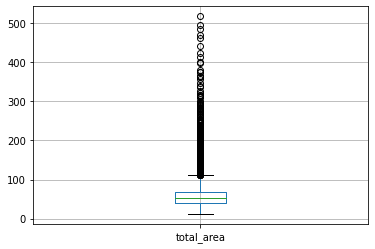

In [22]:
good_data.boxplot('total_area')

После удаления выбросов по цене пропали и тут выбросы с большим метражом. 

In [23]:
import warnings

warnings.filterwarnings("ignore")


good_data.loc[(good_data['ceiling_height'] > 6), 'ceiling_height'] = \
good_data.loc[(good_data['ceiling_height'] > 6), 'ceiling_height']  / 10

good_data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,
        3.65,  3.18,  3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,
        2.63,  3.83,  3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,
        3.86,  4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,
        3.07,  3.37,  3.09,  0.8 ,  3.26,  3.34,  2.81,  3.44,  2.97,
        3.14,  4.37,  2.68,  3.9 ,  3.22,  3.27,  4.1 ,  2.93,  3.46,
        3.47,  3.33,  3.63,  3.32,  1.2 ,  0.83,  2.98,  2.86,  3.17,
        3.28,  4.4 ,

Я несколько часов пыталась разделить на 10 те значения, которые больше 6, но ничего не вышло, поэтому просто их выкинем (к счастью, их немного)
Заодно уберем слишком низкие

In [24]:
good_data.loc[good_data['ceiling_height'] < 2.4, 'ceiling_height'].count()

29

In [25]:
good_data = good_data[~(good_data['ceiling_height'] < 2.4)]
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23538 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23538 non-null  int64  
 1   last_price            23538 non-null  float64
 2   total_area            23538 non-null  float64
 3   first_day_exposition  23538 non-null  object 
 4   rooms                 23538 non-null  int64  
 5   ceiling_height        14386 non-null  float64
 6   floors_total          23452 non-null  float64
 7   living_area           21654 non-null  float64
 8   floor                 23538 non-null  int64  
 9   is_apartment          2754 non-null   object 
 10  studio                23538 non-null  bool   
 11  open_plan             23538 non-null  bool   
 12  kitchen_area          21283 non-null  float64
 13  balcony               12100 non-null  float64
 14  locality_name         23489 non-null  object 
 15  airports_nearest   

Аккуратно обрежем те данные, где потолки подозрительно низкие. Пришлось пользоваться именно такой конструкцией, чтобы не откинуть случайно пропущенные значения

Теперь посмотрим, что там за квариры с потолками больше 3ех метров.

In [26]:
good_data[(good_data['ceiling_height'] > 3)].groupby('price_cat')['price_cat'].count()

price_cat
cheap            5
expencive      496
normal         454
normal_high    424
normal_low      59
Name: price_cat, dtype: int64

Дешевые и недорогие варианты лучше тоже заменить медианным значением:

In [27]:
good_data.loc[(good_data['ceiling_height'] > 3) & ((good_data['price_cat'] == 'cheap') | (good_data['price_cat'] == 'normal_low')), 'ceiling_height'] = \
good_data['ceiling_height'].median()

Тут была замена пропусков для общего кол-ва этажей

In [28]:
good_data[good_data['floors_total'].isna()]['floor'].unique()

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10])

Тут был код с жилплощадью

In [29]:
good_data['is_apartment'] = good_data['is_apartment'].fillna(True)
good_data['is_apartment'].isna().sum()

0

In [30]:
good_data['is_apartment'] = good_data['is_apartment'].astype(bool)
good_data['is_apartment'].dtypes

dtype('bool')

Заменили все пропуски значением True. Показалось логичным, что большинство объявлений все-таки будут квартирами. Ну и формат сразу поменять стоит

Тут была замена площади кухни медианой, убрала ее

Логично заменить пропуски отсутствием балконов

In [31]:
good_data['balcony'] = good_data['balcony'].fillna(0)
good_data['balcony'].isna().sum()

0

In [32]:
good_data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [33]:
good_data.groupby('balcony')['balcony'].count()

balcony
0.0    15163
1.0     4165
2.0     3647
3.0       80
4.0      181
5.0      302
Name: balcony, dtype: int64

Логично предположить, что пустые значения -- отстутсвие балкона

In [34]:
good_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [35]:
good_data['locality_name'].isna().sum()

49

In [36]:
good_data = good_data.dropna(subset=['locality_name']).reset_index(drop=True)
good_data['locality_name'].isna().sum()

0

Глаза уже болят. Если и есть дубликаты, то их не видно. 
Поскольку объектов без локации не так много, их можно и убрать

In [37]:
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year 

In [38]:
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month 

Проверим гипотезу о том, что пустые значения значат что объявление все еще висит:

In [39]:
good_data[good_data['days_exposition'].isna()].groupby('year')['year'].count() 

year
2014      18
2015      68
2016      65
2017     268
2018     947
2019    1783
Name: year, dtype: int64

In [40]:
good_data[good_data['year'] == 2019]['month'].unique()

array([3, 4, 1, 2, 5])

База данных заполнялась до мая 2019 года. Неужели с 2018 года могло остаться висеть столько объявлений? Я бы проверила процентное соотношение, чтобы быть уверенной

In [41]:
good_data[good_data['days_exposition'].isna()].groupby('year')['year'].count() \
/ good_data.groupby('year')['year'].count()

year
2014    0.135338
2015    0.059079
2016    0.023714
2017    0.032964
2018    0.111767
2019    0.623209
Name: year, dtype: float64

В 14 году подозрительно высокий процент пропусков, а вот в 18 и 19 году похоже действительно пустые значения значат, что объявление еще актуально.
Можно заполнить эти пропуски количеством дней с даты публикации (текущая дата - дата публикации), но нужно ли?

In [42]:
good_data['last_price'] = good_data['last_price'].astype(int)
good_data.loc[good_data['floors_total'].isna() == False, 'floors_total'] = \
good_data.loc[good_data['floors_total'].isna() == False, 'floors_total'].astype(int)
good_data.loc[good_data['balcony'].isna() == False, 'balcony'] = \
good_data.loc[good_data['balcony'].isna() == False, 'balcony'].astype(int)
good_data.loc[good_data['airports_nearest'].isna() == False, 'airports_nearest'] = \
good_data.loc[good_data['airports_nearest'].isna() == False, 'airports_nearest'].astype(int)
good_data.loc[good_data['cityCenters_nearest'].isna() == False, 'cityCenters_nearest'] = \
good_data.loc[good_data['cityCenters_nearest'].isna() == False, 'cityCenters_nearest'].astype(int)
good_data.loc[good_data['parks_around3000'].isna() == False, 'parks_around3000'] = \
good_data.loc[good_data['parks_around3000'].isna() == False, 'parks_around3000'].astype(int)
good_data.loc[good_data['parks_nearest'].isna() == False, 'parks_nearest'] = \
good_data.loc[good_data['parks_nearest'].isna() == False, 'parks_nearest'].astype(int)
good_data.loc[good_data['ponds_around3000'].isna() == False, 'ponds_around3000'] = \
good_data.loc[good_data['ponds_around3000'].isna() == False, 'ponds_around3000'].astype(int)
good_data.loc[good_data['ponds_nearest'].isna() == False, 'ponds_nearest'] = \
good_data.loc[good_data['ponds_nearest'].isna() == False, 'ponds_nearest'].astype(int)

### Добавление новых столбцов

In [43]:
good_data['m^2_price'] = good_data['last_price'] / good_data['total_area']

In [44]:
good_data['day'] = pd.DatetimeIndex(good_data['first_day_exposition']).day 
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_cat,year,month,m^2_price,day
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,expencive,2019,3,120370.370370,7
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,normal_low,2018,12,82920.792079,4
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,normal,2015,8,92785.714286,20
3,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,normal_high,2018,6,100000.000000,19
4,10,2890000,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,True,...,NaN,NaN,NaN,NaN,55.0,normal_low,2018,9,95065.789474,10


In [45]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
good_data['floor_cat'] = good_data.apply(floor_cat, axis=1)

In [46]:
good_data['cityCenter_km'] = good_data['cityCenters_nearest'] / 1000

### Исследовательский анализ данных

In [47]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23489 non-null  int64  
 1   last_price            23489 non-null  int64  
 2   total_area            23489 non-null  float64
 3   first_day_exposition  23489 non-null  object 
 4   rooms                 23489 non-null  int64  
 5   ceiling_height        14372 non-null  float64
 6   floors_total          23404 non-null  float64
 7   living_area           21610 non-null  float64
 8   floor                 23489 non-null  int64  
 9   is_apartment          23489 non-null  bool   
 10  studio                23489 non-null  bool   
 11  open_plan             23489 non-null  bool   
 12  kitchen_area          21243 non-null  float64
 13  balcony               23489 non-null  int64  
 14  locality_name         23489 non-null  object 
 15  airports_nearest   

<AxesSubplot:>

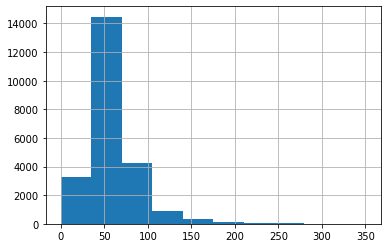

In [48]:
good_data['total_area'].hist(bins=10, range=(0,350))

In [49]:
good_data['total_area'].mean()

59.22638724509344

In [50]:
good_data['total_area'].median()

52.0

Распределение выглядит очень правдоподбно, если основываться на бытовом опыте.
Медиана и среднее различаются совсем незначительно + судя по виду распределния можно сделать вывод, что оно нормальное

<AxesSubplot:>

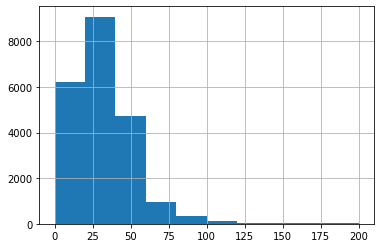

In [51]:
good_data['living_area'].hist(bins=10, range=(0,200))

In [52]:
good_data['living_area'].mean()

33.86268725173531

In [53]:
good_data['living_area'].median()

30.0

И тут то же самое

<AxesSubplot:>

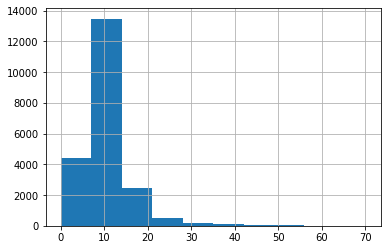

In [54]:
good_data['kitchen_area'].hist(bins=10, range=(0,70))

In [55]:
good_data['kitchen_area'].mean()

10.441688085486984

In [56]:
good_data['kitchen_area'].median()

9.1

<AxesSubplot:>

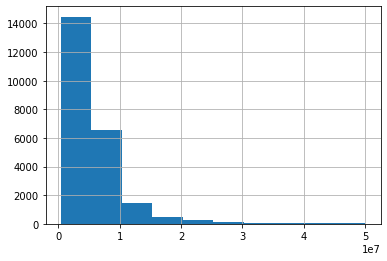

In [57]:
good_data['last_price'].hist(bins=10)

In [58]:
good_data['last_price'].mean()

6001113.674230491

In [59]:
good_data['last_price'].median()

4600000.0

Судя по графику, подавляющее большинство квартир входят в категорию стоимости до 10млн. Тоже все логично.
Вид распределения ближе к Пуассону
Особо дорогие квартиры сдвигают среднее в большую сторону

<AxesSubplot:>

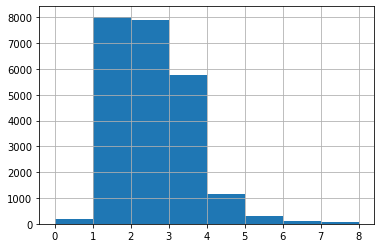

In [60]:
good_data['rooms'].hist(bins=8, range=(0,8))

In [61]:
good_data['rooms'].median()

2.0

In [62]:
good_data['rooms'].mean()

2.0561539443995063

Точно так же вписывается в обычные представления о квартирах.
Распределение Пуассона, среднее и медиана близки -- выбросов почти нет.

<AxesSubplot:>

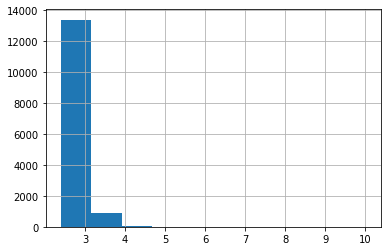

In [63]:
good_data['ceiling_height'].hist()

In [64]:
good_data['ceiling_height'].median()

2.65

In [65]:
good_data['ceiling_height'].mean()

2.7196541887002503

С потолками тоже вс в норме. Немного смущают совсем большие значения, но вдруг это какие-то ангары?.. В общем, решила не убирать их, тем более что это вряд ли самый важный параметр для анализа, да и странных значений немного.
Снова распределение Пуассона

<AxesSubplot:>

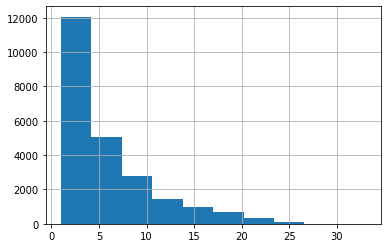

In [66]:
good_data['floor'].hist()

In [67]:
good_data['floor'].median()

4.0

In [68]:
good_data['floor'].mean()

5.895993869470816

Пуассон. 

<AxesSubplot:>

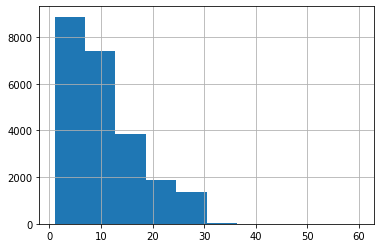

In [69]:
good_data['floors_total'].hist()

In [70]:
good_data['floors_total'].median()

9.0

In [71]:
good_data['floors_total'].mean()

10.695393949752178

Также Пуассон.
Медиана в классике российских реалий -- большинство девятиэтажек.

<AxesSubplot:>

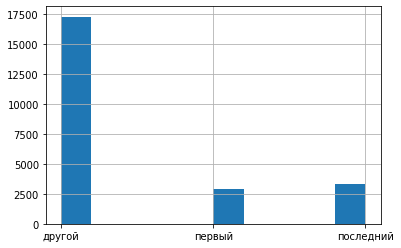

In [72]:
good_data['floor_cat'].hist()

Тут тоже все в порядке

<AxesSubplot:>

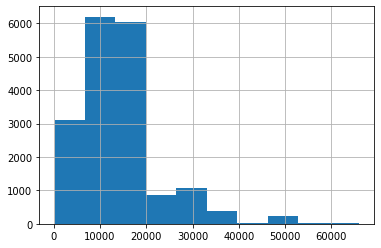

In [73]:
good_data['cityCenters_nearest'].hist()

In [74]:
good_data['cityCenters_nearest'].median()

13149.0

In [75]:
good_data['cityCenters_nearest'].mean()

14266.473271838186

Данные абсолютно логичны. Подавляющее большинство в диапазоне до 13 км. Как от стандартного спальника до центра.
Все что за пределами 20км -- ленобласть.
Площадь СПб 1400км^2, отсюда корень ~ 40, значит, радиус как раз в районе 20.
Характер распределения нестандартный из-за четкого деления на город и область

<AxesSubplot:>

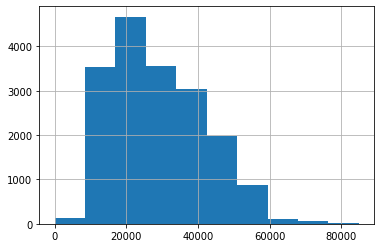

In [76]:
good_data['airports_nearest'].hist()

In [77]:
good_data['airports_nearest'].median()

26770.0

In [78]:
good_data['airports_nearest'].mean()

28818.51716272601

Выглядит адекватно. Пуассон

<AxesSubplot:>

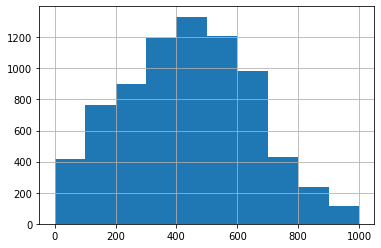

In [79]:
good_data['parks_nearest'].hist(range=(0,1000))

In [80]:
good_data['parks_nearest'].median()

456.0

In [81]:
good_data['parks_nearest'].mean()

492.1420311714429

Выбрала диапазон до 1000, потому что дальше данных мало. Почти классическое нормальное распределение

<AxesSubplot:>

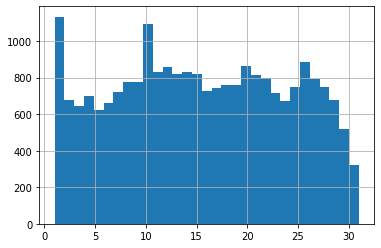

In [82]:
good_data['day'].hist(bins=31)

In [83]:
good_data['day'].median()

15.0

In [84]:
good_data['day'].mean()

15.467708288986334

Похоже на реальность. Резкие пики 1 и 10 числа могут быть связаны с тем, что это даты регулярной публикации для агенств. Спад под конец очевиден -- не во всех месяцах есть 31 день.
Среднее -- середина месяца. Как раз и говорит о том, что в целом нет особого различия по датам

<AxesSubplot:>

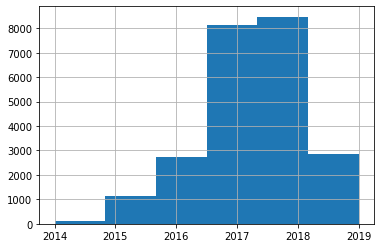

In [85]:
good_data['year'].hist(bins=6)

In [86]:
good_data['year'].median()

2017.0

In [87]:
good_data['year'].mean()

2017.372642513517

В первые года объявлений совсем мало, именно поэтому среднее и съехало вниз от медианы

<AxesSubplot:>

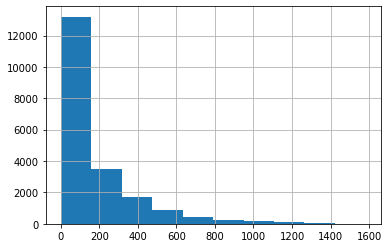

In [88]:
good_data['days_exposition'].hist()

<AxesSubplot:>

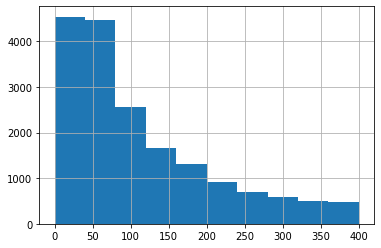

In [89]:
good_data['days_exposition'].hist(range=(0, 400))

In [90]:
good_data['days_exposition'].mean()

180.0461651917404

In [91]:
good_data['days_exposition'].median()

95.0

In [92]:
good_data['days_exposition'].median() / 2

47.5

Как раз полтора месяца 1 квартиль

In [93]:
good_data['days_exposition'].median() + good_data['days_exposition'].median() / 2

142.5

5.5 месяцев

Быстрая продажа -- месяц-два
Необычайно долгая -- больше полугода

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

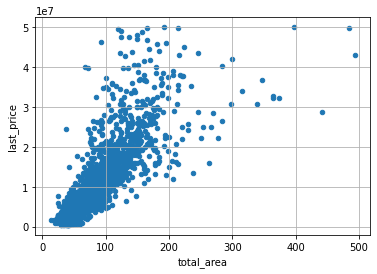

In [94]:
(good_data
    .pivot_table(index='last_price', values='total_area').reset_index()
    .plot(x='total_area', y='last_price', kind='scatter', grid=True)
)

In [95]:
good_data.pivot_table(index='last_price', values='total_area').reset_index().corr()

,last_price,total_area
last_price,1.000000,0.820148
total_area,0.820148,1.000000


Очевидна линейная зависимость с несколькими выбросами для большой площади. Высокий индекс корреляции это только подтверждает

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

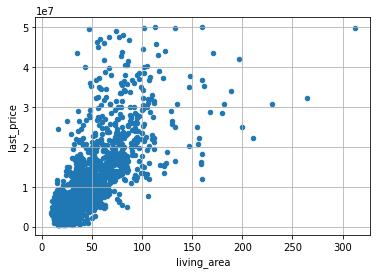

In [96]:
(good_data
    .pivot_table(index='last_price', values='living_area').reset_index()
    .plot(x='living_area', y='last_price', kind='scatter', grid=True)
)

In [97]:
good_data.pivot_table(index='last_price', values='living_area').reset_index().corr()

,last_price,living_area
last_price,1.0000,0.7472
living_area,0.7472,1.0000


В районе 25м жилой площади можно увидеть, что точки выстраиваются в вертикальную полоску. Это может быть связано с заполнением пропусков медианной величиной.
К-т корреляции все еще высокий
!!UPD действительно дело было в медиане, без нее полоски нет)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

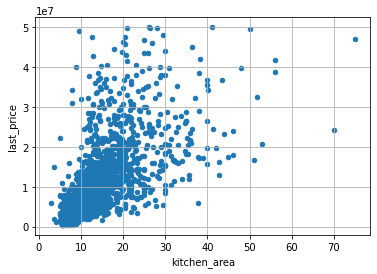

In [98]:
(good_data
    .pivot_table(index='last_price', values='kitchen_area').reset_index()
    .plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)
)

In [99]:
good_data.pivot_table(index='last_price', values='kitchen_area').reset_index().corr()

,last_price,kitchen_area
last_price,1.000000,0.656441
kitchen_area,0.656441,1.000000


Практически аналогичная зависимость. Естественно, что они будут совпадать, т.к. величины жилой общей и кухонной площадей соотносятся друг с другом.
К-т корреляции пониже. Скорее всего это связано с тем, что с увеличением общей площади квартиры, кухня не настолько сильно растет

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

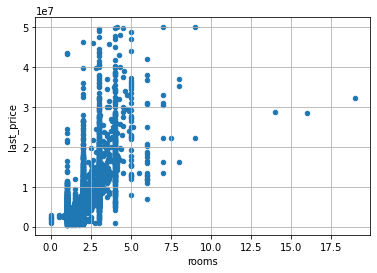

In [100]:
(good_data
    .pivot_table(index='last_price', values='rooms').reset_index()
    .plot(x='rooms', y='last_price', kind='scatter', grid=True)
)

In [101]:
good_data.pivot_table(index='last_price', values='rooms').reset_index().corr()

,last_price,rooms
last_price,1.000000,0.619236
rooms,0.619236,1.000000


Также видим отчетливую линейную зависимость. Полоски связаны с тем, что количество комнат дискретно.
Линейная зависимость также похожа на зависимость от площади, потому что количество комнат будет с ней коррелировать

<AxesSubplot:xlabel='rooms', ylabel='total_area'>

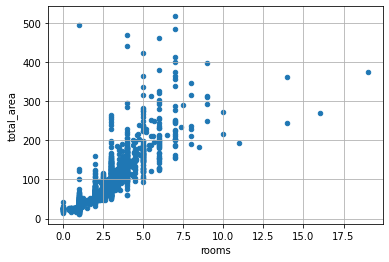

In [102]:
(good_data
    .pivot_table(index='total_area', values='rooms').reset_index()
    .plot(x='rooms', y='total_area', kind='scatter', grid=True)
)

In [103]:
good_data.pivot_table(index='total_area', values='rooms').reset_index().corr()

,total_area,rooms
total_area,1.000000,0.834646
rooms,0.834646,1.000000


Тут даже сказать нечего. Естетсвенно, количество комнат напрямую связано с метражом.

<AxesSubplot:xlabel='floor_cat'>

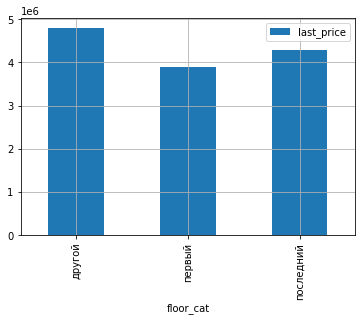

In [104]:
(good_data
    .pivot_table(index='floor_cat', values='last_price', aggfunc='median').reset_index()
    .plot(x='floor_cat', y='last_price', kind='bar', grid=True)
)


In [105]:
good_data.pivot_table(index='floor_cat', values='last_price').reset_index().corr()

,last_price
last_price,1.0


Никто не хочет квартиру на последнем и особенно на первом этаже
А вот к-т корреляции куда-то пополыл

<AxesSubplot:xlabel='day', ylabel='last_price'>

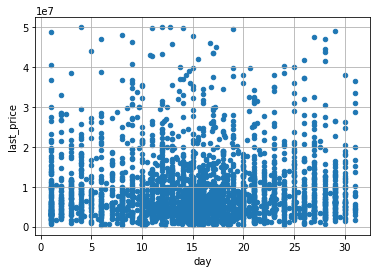

In [106]:
(good_data
    .pivot_table(index='last_price', values='day').reset_index()
    .plot(x='day', y='last_price', kind='scatter', grid=True)
)

In [107]:
good_data.pivot_table(index='last_price', values='day').reset_index().corr()

,last_price,day
last_price,1.000000,0.011455
day,0.011455,1.000000


Ничего не ясно, корреляции нет и быть не должно. Инлекс корреляции это тоже подтверждает


<AxesSubplot:xlabel='month', ylabel='last_price'>

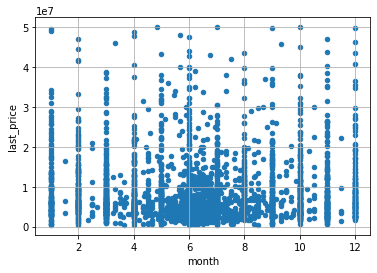

In [108]:
(good_data
    .pivot_table(index='last_price', values='month').reset_index()
    .plot(x='month', y='last_price', kind='scatter', grid=True)
)

In [109]:
good_data.pivot_table(index='last_price', values='month').reset_index().corr()

,last_price,month
last_price,1.000000,0.002413
month,0.002413,1.000000


С месяцем все аналогично. Никакой корреляции.

<AxesSubplot:xlabel='year', ylabel='last_price'>

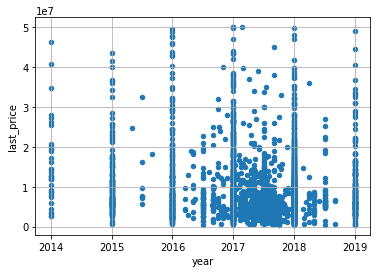

In [110]:
(good_data
    .pivot_table(index='last_price', values='year').reset_index()
    .plot(x='year', y='last_price', kind='scatter', grid=True)
)

In [111]:
good_data.pivot_table(index='last_price', values='year').reset_index().corr()

,last_price,year
last_price,1.000000,-0.106031
year,-0.106031,1.000000


А вот с годом можно увидеть незначительную корреляцию.

In [112]:
good_data['m^2'] = good_data['last_price'] / good_data['total_area']
good_data = good_data[good_data['m^2'] < 400000]

In [113]:
(good_data
 .pivot_table(index='locality_name', values='m^2', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'm^2'), ascending=False).head(10)
)

,count,mean
,m^2,m^2
locality_name,,
Санкт-Петербург,15561,111773.511669
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,396,67275.625879
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763


<AxesSubplot:xlabel='cityCenter_km', ylabel='m^2'>

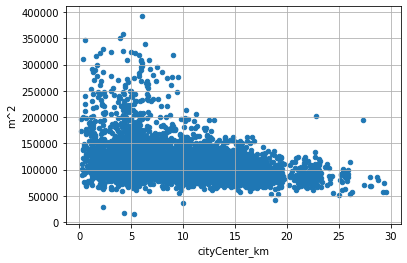

In [114]:
(good_data[good_data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='cityCenter_km', values='m^2').reset_index()
    .plot(x='cityCenter_km', y='m^2', kind='scatter', grid=True)
)

In [115]:
(good_data[good_data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='cityCenter_km', values='m^2').reset_index()
    .corr()
)

,cityCenter_km,m^2
cityCenter_km,1.000000,-0.372031
m^2,-0.372031,1.000000


### Общий вывод

После выполнения проекта усвоила работу с пропусками. Главное, что чаще всего заоплнить их нельзя. И с данными с пропусками тоже можно делать анализ.

База данных в проекте была очень опрятная, только в столбце с высотой потолков бардак был. Все остальные параметры были распределены либо нормально, либо по Пуассона.

Поиск линейных зависимостей в данных подтвердил общеизвестные рациональные соображения:
- сильнее всего цена квартиры связана с общим метражом
- метражи жилплощади и кухни тоже влияют, но не так сильно
- есть зависимость от количества комнат (но она полностью обусловлена связью с общим метражом)
- цена ниже для квартир на последнем, и особенно на первом этажах
- стоимость не зависит от дня и месяца публикации
- с годами цена квартир немного выросла
- квартиры ближе к центру немного дороже (думаю, тут нет яркой зависимости, потому что районы в городе распределены неоднородно. Рядом с центром есть отвратительные районы промзоны, которые смазывают эту зависимость, да и сам центр нелинейный. Если сделать группировку по районам, тогда можно увидеть, что жилье в центре значительно дороже)
